## Name: Vaibhav Bichave

## Implement anomaly detection for given ecg dataset using Autoencoder and build the model by using the following steps:
    a. Import required libraries
    b. Upload/ access thedataset
    c. Encoder converts it into latent representation
    d. Decoder networks convert itback to the original input
    e. Compile the models with Optimizer,Loss,and Evaluation Metrics 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('ecg.csv',header=None)

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0.0
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0.0
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0.0
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0.0


In [4]:
X  = data.drop(140,axis=1)
y = data[140]

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,y,random_state=42,test_size=0.2)

In [6]:
X_train.shape,X_test.shape

((3998, 140), (1000, 140))

In [7]:
from sklearn.preprocessing import MinMaxScaler
lb = MinMaxScaler(feature_range=(0,1))
X_train = lb.fit_transform(X_train)
X_test = lb.transform(X_test)

In [8]:
y_train = y_train.astype(bool)
y_test = y_test.astype(bool)

In [9]:
normal_train = X_train[y_train]
normal_test = X_test[y_test]

fraud_train = X_train[~y_train]
fraud_test = X_test[~y_test]

In [10]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

In [11]:
encoder = Sequential([
    Dense(140,activation='relu',input_shape=(140,)),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(16,activation='relu'),
    Dense(8,activation='relu'),
])

decoder = Sequential([
    Dense(8,activation='relu'),
    Dense(16,activation='relu'),
    Dense(32,activation='relu'),
    Dense(64,activation='relu'),
    Dense(140,activation='relu'),
])(encoder.output)


In [12]:
model = Model(inputs=encoder.input, outputs=decoder)

In [13]:
model.compile(loss='msle',metrics=['mse'],optimizer='adam')

In [14]:
epochs = 20
H =model.fit(normal_train,normal_train,validation_data=(X_test,X_test),epochs=epochs)

Epoch 1/20
73/73 [==============================] - 8s 33ms/step - loss: 0.1175 - mse: 0.2044 - val_loss: 0.1020 - val_mse: 0.1741
Epoch 2/20
73/73 [==============================] - 2s 25ms/step - loss: 0.1002 - mse: 0.1700 - val_loss: 0.1019 - val_mse: 0.1739
Epoch 3/20
73/73 [==============================] - 2s 22ms/step - loss: 0.1001 - mse: 0.1700 - val_loss: 0.1019 - val_mse: 0.1739
Epoch 4/20
73/73 [==============================] - 1s 19ms/step - loss: 0.1001 - mse: 0.1700 - val_loss: 0.1019 - val_mse: 0.1738
Epoch 5/20
73/73 [==============================] - 1s 16ms/step - loss: 0.1001 - mse: 0.1700 - val_loss: 0.1019 - val_mse: 0.1739
Epoch 6/20
73/73 [==============================] - 1s 15ms/step - loss: 0.1001 - mse: 0.1699 - val_loss: 0.1017 - val_mse: 0.1734
Epoch 7/20
73/73 [==============================] - 1s 12ms/step - loss: 0.0992 - mse: 0.1683 - val_loss: 0.0996 - val_mse: 0.1696
Epoch 8/20
73/73 [==============================] - 1s 12ms/step - loss: 0.0964 - m

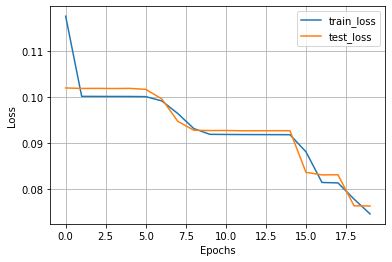

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['loss'],label = 'train_loss')
plt.plot(range(0,epochs),H.history['val_loss'],label = 'test_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

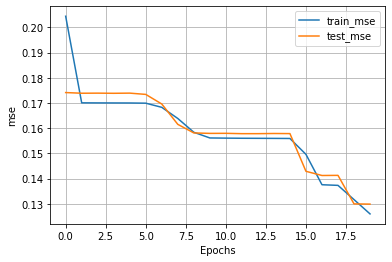

In [16]:
plt.plot(range(0,epochs),H.history['mse'],label = 'train_mse')
plt.plot(range(0,epochs),H.history['val_mse'],label = 'test_mse')
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.legend()
plt.grid()

In [17]:
import numpy as np
from tensorflow.keras.losses import mse

prediction = model(X_test)
error = mse(prediction,X_test)
error = np.asarray(error)
threshold = np.percentile(error, 95)
print('threshold',threshold)

threshold 0.1397735364698533


In [18]:
df = pd.DataFrame()
df['error'] = error
df['threshold'] =threshold

x_range = range(0,df.shape[0])

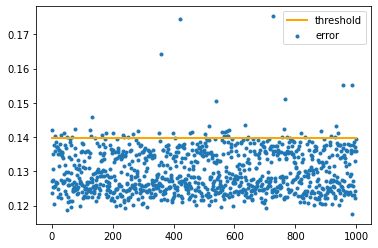

In [19]:
import matplotlib.pyplot as plt
plt.plot(x_range,df['threshold'],color='orange',linewidth=2,label ='threshold')
plt.scatter(x_range,df['error'],marker='.',label='error')
plt.legend();